In [124]:
import struct
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('bgg_dataset.csv', delimiter=';', decimal=",")
df.head()

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017.0,1,4,120,14,42055,8.79,1,3.86,68323.0,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,161936.0,Pandemic Legacy: Season 1,2015.0,2,4,60,13,41643,8.61,2,2.84,65294.0,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games"
2,224517.0,Brass: Birmingham,2018.0,2,4,120,14,19217,8.66,3,3.91,28785.0,"Hand Management, Income, Loans, Market, Networ...",Strategy Games
3,167791.0,Terraforming Mars,2016.0,1,5,120,12,64864,8.43,4,3.24,87099.0,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games
4,233078.0,Twilight Imperium: Fourth Edition,2017.0,3,6,480,14,13468,8.70,5,4.22,16831.0,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games"


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20327 non-null  float64
 1   Name                20343 non-null  object 
 2   Year Published      20342 non-null  float64
 3   Min Players         20343 non-null  int64  
 4   Max Players         20343 non-null  int64  
 5   Play Time           20343 non-null  int64  
 6   Min Age             20343 non-null  int64  
 7   Users Rated         20343 non-null  int64  
 8   Rating Average      20343 non-null  float64
 9   BGG Rank            20343 non-null  int64  
 10  Complexity Average  20343 non-null  float64
 11  Owned Users         20320 non-null  float64
 12  Mechanics           18745 non-null  object 
 13  Domains             10184 non-null  object 
dtypes: float64(5), int64(6), object(3)
memory usage: 2.2+ MB


In [126]:
df.describe()

,ID,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users
count,20327.000000,20342.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20320.000000
mean,108216.245142,1984.249877,2.019712,5.672221,91.294548,9.601485,840.971391,6.403227,10172.890429,1.991188,1408.457628
std,98682.097298,214.003181,0.690366,15.231376,545.447203,3.645458,3511.562220,0.935911,5872.831597,0.848903,5040.179315
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1.050000,1.000000,0.000000,0.000000
25%,11029.000000,2001.000000,2.000000,4.000000,30.000000,8.000000,55.000000,5.820000,5087.500000,1.330000,146.000000
50%,88931.000000,2011.000000,2.000000,4.000000,45.000000,10.000000,120.000000,6.430000,10173.000000,1.970000,309.000000
75%,192939.500000,2016.000000,2.000000,6.000000,90.000000,12.000000,385.000000,7.030000,15258.500000,2.540000,864.000000
max,331787.000000,2022.000000,10.000000,999.000000,60000.000000,25.000000,102214.000000,9.580000,20344.000000,5.000000,155312.000000


In [127]:
domain_df = df['Domains'].str.get_dummies(sep=", ")
domain_list = list(domain_df)
mechanics_df = df['Mechanics'].str.get_dummies(sep=", ")
mechanics_list = list(mechanics_df)

In [128]:
df_merge = pd.concat([df, mechanics_df, domain_df], axis=1)
df_merge.drop(columns = ['ID', 'Mechanics', 'Domains'], inplace=True)
df_merge

,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,...,Worker Placement with Dice Workers,Zone of Control,Abstract Games,Children's Games,Customizable Games,Family Games,Party Games,Strategy Games,Thematic Games,Wargames
0,Gloomhaven,2017.0,1,4,120,14,42055,8.79,1,3.86,...,0,0,0,0,0,0,0,1,1,0
1,Pandemic Legacy: Season 1,2015.0,2,4,60,13,41643,8.61,2,2.84,...,0,0,0,0,0,0,0,1,1,0
2,Brass: Birmingham,2018.0,2,4,120,14,19217,8.66,3,3.91,...,0,0,0,0,0,0,0,1,0,0
3,Terraforming Mars,2016.0,1,5,120,12,64864,8.43,4,3.24,...,0,0,0,0,0,0,0,1,0,0
4,Twilight Imperium: Fourth Edition,2017.0,3,6,480,14,13468,8.70,5,4.22,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20338,War,0.0,2,2,30,4,1340,2.28,20340,1.00,...,0,0,0,1,0,0,0,0,0,0
20339,Bingo,1530.0,2,99,60,5,2154,2.85,20341,1.05,...,0,0,0,0,0,0,1,0,0,0
20340,Candy Land,1949.0,2,4,30,3,4006,3.18,20342,1.08,...,0,0,0,1,0,0,0,0,0,0
20341,Chutes and Ladders,-200.0,2,6,30,3,3783,2.86,20343,1.02,...,0,0,0,1,0,0,0,0,0,0


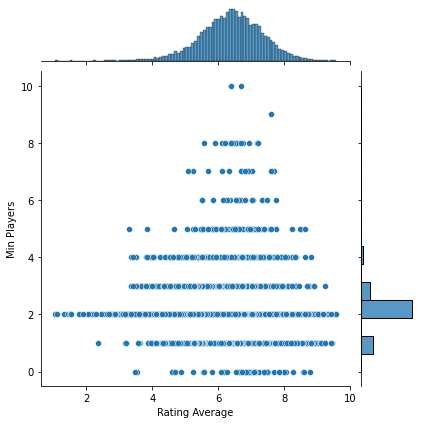

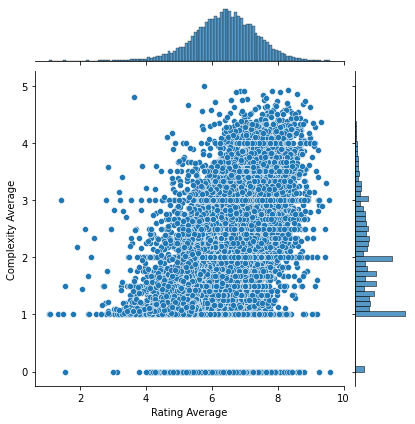

In [129]:
To_plot = ["Min Players", "Complexity Average"]
for i in To_plot:
    sns.jointplot(x=df_merge["Rating Average"], y=df_merge[i])
    plt.show()

In [130]:
top_100_df = df_merge.nsmallest(100, "BGG Rank")
top_100_df

,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,...,Worker Placement with Dice Workers,Zone of Control,Abstract Games,Children's Games,Customizable Games,Family Games,Party Games,Strategy Games,Thematic Games,Wargames
0,Gloomhaven,2017.0,1,4,120,14,42055,8.79,1,3.86,...,0,0,0,0,0,0,0,1,1,0
1,Pandemic Legacy: Season 1,2015.0,2,4,60,13,41643,8.61,2,2.84,...,0,0,0,0,0,0,0,1,1,0
2,Brass: Birmingham,2018.0,2,4,120,14,19217,8.66,3,3.91,...,0,0,0,0,0,0,0,1,0,0
3,Terraforming Mars,2016.0,1,5,120,12,64864,8.43,4,3.24,...,0,0,0,0,0,0,0,1,0,0
4,Twilight Imperium: Fourth Edition,2017.0,3,6,480,14,13468,8.70,5,4.22,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Lorenzo il Magnifico,2016.0,2,4,120,12,9140,7.89,96,3.28,...,1,0,0,0,0,0,0,1,0,0
96,Sherlock Holmes Consulting Detective: The Tham...,1982.0,1,8,120,13,17236,7.73,97,2.68,...,0,0,0,0,0,0,0,0,1,0
97,Dominion,2008.0,2,4,30,13,78089,7.62,98,2.36,...,0,0,0,0,0,0,0,1,0,0
98,Pandemic,2008.0,2,4,45,8,102214,7.61,99,2.41,...,0,0,0,0,0,1,0,1,0,0


In [131]:
top_100_domains = pd.melt(top_100_df, id_vars=['Name'], var_name="Domain", value_vars=['Abstract Games', "Children's Games", 'Customizable Games', 'Family Games', 'Party Games', 'Strategy Games', 'Thematic Games', 'Wargames'])
top_100_domains = top_100_domains[top_100_domains.value !=0]

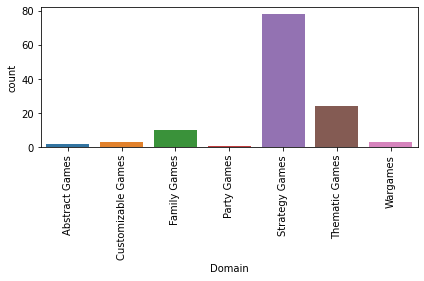

In [132]:
top_100_domain_countplot = sns.countplot(x="Domain", data=top_100_domains)
plt.xticks(rotation=90)
plt.tight_layout()

In [133]:
top_100_mechanics = pd.melt(top_100_df, id_vars=['Name'], var_name="Mechanic", value_vars=['Acting', 'Action Drafting', 'Action Points', 'Action Queue', 'Action Retrieval', 'Action Timer', 'Action/Event', 'Advantage Token', 'Alliances', 'Area Majority / Influence', 'Area Movement', 'Area-Impulse', 'Auction/Bidding', 'Auction: Dexterity', 'Auction: Dutch', 'Auction: Dutch Priority', 'Auction: English', 'Auction: Fixed Placement', 'Auction: Once Around', 'Auction: Sealed Bid', 'Auction: Turn Order Until Pass', 'Automatic Resource Growth', 'Betting and Bluffing', 'Bias', 'Bingo', 'Bribery', 'Campaign / Battle Card Driven', 'Card Drafting', 'Card Play Conflict Resolution', 'Catch the Leader', 'Chaining', 'Chit-Pull System', 'Closed Economy Auction', 'Command Cards', 'Commodity Speculation', 'Communication Limits', 'Connections', 'Constrained Bidding', 'Contracts', 'Cooperative Game', 'Crayon Rail System', 'Critical Hits and Failures', 'Cube Tower', 'Deck Bag and Pool Building', 'Deck Construction', 'Deduction', 'Delayed Purchase', 'Dice Rolling', 'Die Icon Resolution', 'Different Dice Movement', 'Different Worker Types', 'Drafting', 'Elapsed Real Time Ending', 'Enclosure', 'End Game Bonuses', 'Events', 'Finale Ending', 'Flicking', 'Follow', 'Force Commitment', 'Grid Coverage', 'Grid Movement', 'Hand Management', 'Hexagon Grid', 'Hidden Movement', 'Hidden Roles', 'Hidden Victory Points', 'Highest-Lowest Scoring', 'Hot Potato', 'I Cut You Choose', 'Impulse Movement', 'Income', 'Increase Value of Unchosen Resources', 'Induction', 'Interrupts', 'Investment', 'Kill Steal', 'King of the Hill', 'Ladder Climbing', 'Layering', 'Legacy Game', 'Line Drawing', 'Line of Sight', 'Loans', 'Lose a Turn', 'Mancala', 'Map Addition', 'Map Deformation', 'Map Reduction', 'Market', 'Matching', 'Measurement Movement', 'Melding and Splaying', 'Memory', 'Minimap Resolution', 'Modular Board', 'Move Through Deck', 'Movement Points', 'Movement Template', 'Moving Multiple Units', 'Multiple Maps', 'Multiple-Lot Auction', 'Narrative Choice / Paragraph', 'Negotiation', 'Network and Route Building', 'Once-Per-Game Abilities', 'Order Counters', 'Ownership', 'Paper-and-Pencil', 'Passed Action Token', 'Pattern Building', 'Pattern Movement', 'Pattern Recognition', 'Physical Removal', 'Pick-up and Deliver', 'Pieces as Map', 'Player Elimination', 'Player Judge', 'Point to Point Movement', 'Predictive Bid', "Prisoner's Dilemma", 'Programmed Movement', 'Push Your Luck', 'Race', 'Random Production', 'Ratio / Combat Results Table', 'Re-rolling and Locking', 'Real-Time', 'Relative Movement', 'Resource to Move', 'Rock-Paper-Scissors', 'Role Playing', 'Roles with Asymmetric Information', 'Roll / Spin and Move', 'Rondel', 'Scenario / Mission / Campaign Game', 'Score-and-Reset Game', 'Secret Unit Deployment', 'Selection Order Bid', 'Semi-Cooperative Game', 'Set Collection', 'Simulation', 'Simultaneous Action Selection', 'Singing', 'Single Loser Game', 'Slide/Push', 'Solo / Solitaire Game', 'Speed Matching', 'Square Grid', 'Stacking and Balancing', 'Stat Check Resolution', 'Static Capture', 'Stock Holding', 'Storytelling', 'Sudden Death Ending', 'Take That', 'Targeted Clues', 'Team-Based Game', 'Tech Trees / Tech Tracks', 'Three Dimensional Movement', 'Tile Placement', 'Time Track', 'Track Movement', 'Trading', 'Traitor Game', 'Trick-taking', 'Tug of War', 'Turn Order: Auction', 'Turn Order: Claim Action', 'Turn Order: Pass Order', 'Turn Order: Progressive', 'Turn Order: Random', 'Turn Order: Role Order', 'Turn Order: Stat-Based', 'Variable Phase Order', 'Variable Player Powers', 'Variable Set-up', 'Victory Points as a Resource', 'Voting', 'Worker Placement', 'Worker Placement with Dice Workers', 'Zone of Control'])
top_100_mechanics = top_100_mechanics[top_100_mechanics.value !=0]

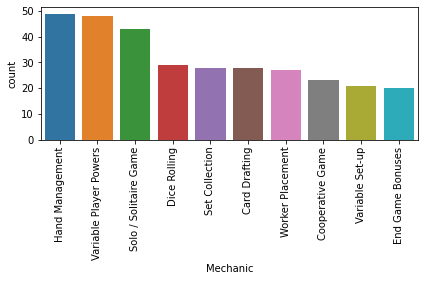

In [134]:
top_100_mechanics_countplot = sns.countplot(x="Mechanic", data=top_100_mechanics, order=top_100_mechanics.Mechanic.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.tight_layout()

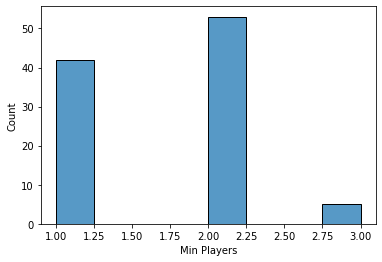

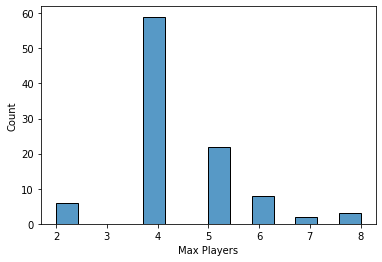

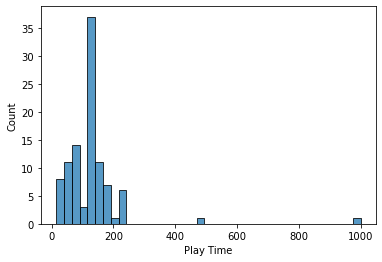

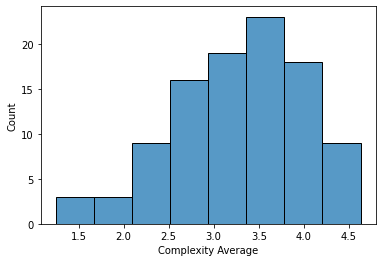

In [135]:
To_plot = ["Min Players","Max Players","Play Time", "Complexity Average"]
for i in To_plot:
    sns.histplot(x=top_100_df[i])
    plt.show()

In [136]:
mechanics_rating = pd.melt(df_merge, id_vars=['Rating Average'], var_name="Mechanic", value_vars=['Acting', 'Action Drafting', 'Action Points', 'Action Queue', 'Action Retrieval', 'Action Timer', 'Action/Event', 'Advantage Token', 'Alliances', 'Area Majority / Influence', 'Area Movement', 'Area-Impulse', 'Auction/Bidding', 'Auction: Dexterity', 'Auction: Dutch', 'Auction: Dutch Priority', 'Auction: English', 'Auction: Fixed Placement', 'Auction: Once Around', 'Auction: Sealed Bid', 'Auction: Turn Order Until Pass', 'Automatic Resource Growth', 'Betting and Bluffing', 'Bias', 'Bingo', 'Bribery', 'Campaign / Battle Card Driven', 'Card Drafting', 'Card Play Conflict Resolution', 'Catch the Leader', 'Chaining', 'Chit-Pull System', 'Closed Economy Auction', 'Command Cards', 'Commodity Speculation', 'Communication Limits', 'Connections', 'Constrained Bidding', 'Contracts', 'Cooperative Game', 'Crayon Rail System', 'Critical Hits and Failures', 'Cube Tower', 'Deck Bag and Pool Building', 'Deck Construction', 'Deduction', 'Delayed Purchase', 'Dice Rolling', 'Die Icon Resolution', 'Different Dice Movement', 'Different Worker Types', 'Drafting', 'Elapsed Real Time Ending', 'Enclosure', 'End Game Bonuses', 'Events', 'Finale Ending', 'Flicking', 'Follow', 'Force Commitment', 'Grid Coverage', 'Grid Movement', 'Hand Management', 'Hexagon Grid', 'Hidden Movement', 'Hidden Roles', 'Hidden Victory Points', 'Highest-Lowest Scoring', 'Hot Potato', 'I Cut You Choose', 'Impulse Movement', 'Income', 'Increase Value of Unchosen Resources', 'Induction', 'Interrupts', 'Investment', 'Kill Steal', 'King of the Hill', 'Ladder Climbing', 'Layering', 'Legacy Game', 'Line Drawing', 'Line of Sight', 'Loans', 'Lose a Turn', 'Mancala', 'Map Addition', 'Map Deformation', 'Map Reduction', 'Market', 'Matching', 'Measurement Movement', 'Melding and Splaying', 'Memory', 'Minimap Resolution', 'Modular Board', 'Move Through Deck', 'Movement Points', 'Movement Template', 'Moving Multiple Units', 'Multiple Maps', 'Multiple-Lot Auction', 'Narrative Choice / Paragraph', 'Negotiation', 'Network and Route Building', 'Once-Per-Game Abilities', 'Order Counters', 'Ownership', 'Paper-and-Pencil', 'Passed Action Token', 'Pattern Building', 'Pattern Movement', 'Pattern Recognition', 'Physical Removal', 'Pick-up and Deliver', 'Pieces as Map', 'Player Elimination', 'Player Judge', 'Point to Point Movement', 'Predictive Bid', "Prisoner's Dilemma", 'Programmed Movement', 'Push Your Luck', 'Race', 'Random Production', 'Ratio / Combat Results Table', 'Re-rolling and Locking', 'Real-Time', 'Relative Movement', 'Resource to Move', 'Rock-Paper-Scissors', 'Role Playing', 'Roles with Asymmetric Information', 'Roll / Spin and Move', 'Rondel', 'Scenario / Mission / Campaign Game', 'Score-and-Reset Game', 'Secret Unit Deployment', 'Selection Order Bid', 'Semi-Cooperative Game', 'Set Collection', 'Simulation', 'Simultaneous Action Selection', 'Singing', 'Single Loser Game', 'Slide/Push', 'Solo / Solitaire Game', 'Speed Matching', 'Square Grid', 'Stacking and Balancing', 'Stat Check Resolution', 'Static Capture', 'Stock Holding', 'Storytelling', 'Sudden Death Ending', 'Take That', 'Targeted Clues', 'Team-Based Game', 'Tech Trees / Tech Tracks', 'Three Dimensional Movement', 'Tile Placement', 'Time Track', 'Track Movement', 'Trading', 'Traitor Game', 'Trick-taking', 'Tug of War', 'Turn Order: Auction', 'Turn Order: Claim Action', 'Turn Order: Pass Order', 'Turn Order: Progressive', 'Turn Order: Random', 'Turn Order: Role Order', 'Turn Order: Stat-Based', 'Variable Phase Order', 'Variable Player Powers', 'Variable Set-up', 'Victory Points as a Resource', 'Voting', 'Worker Placement', 'Worker Placement with Dice Workers', 'Zone of Control'])
mechanics_rating = mechanics_rating[mechanics_rating.value !=0]
mechanics_rating.rename(columns= {'Rating Average':'Rating'}, inplace=True)
mechanics_rating.drop('value', axis=1, inplace=True)

In [137]:
mechanics_rating

,Rating,Mechanic
342,7.79,Acting
413,7.71,Acting
515,7.42,Acting
520,7.29,Acting
640,6.88,Acting
...,...,...
3701598,3.17,Zone of Control
3701786,4.66,Zone of Control
3701819,4.47,Zone of Control
3701857,5.00,Zone of Control


In [138]:
mechanics_avg = mechanics_rating.groupby("Mechanic").median()
mechanics_avg = mechanics_avg.sort_values(by='Rating', ascending=False)
mechanics_avg

,Rating
Mechanic,
Automatic Resource Growth,7.870
Legacy Game,7.870
Ownership,7.755
Turn Order: Auction,7.735
Different Worker Types,7.695
...,...
Induction,6.085
Static Capture,5.955
Hot Potato,5.935


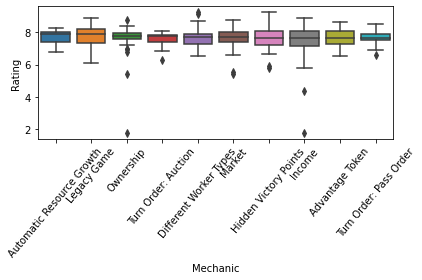

In [139]:
mechanics_boxplot = sns.boxplot(x="Mechanic", y="Rating", data=mechanics_rating, order=mechanics_avg.iloc[:10].index)
plt.xticks(rotation=50)
plt.tight_layout()

In [140]:
domain_df = pd.melt(df_merge, id_vars=['Name'], var_name="Domain", value_vars=['Abstract Games', "Children's Games", 'Customizable Games', 'Family Games', 'Party Games', 'Strategy Games', 'Thematic Games', 'Wargames'])
domain_df = domain_df[domain_df.value !=0]

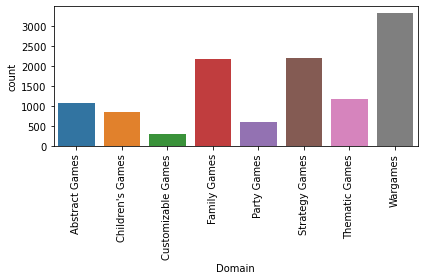

In [141]:
domains_countplot = sns.countplot(x="Domain", data=domain_df)
plt.xticks(rotation=90)
plt.tight_layout()

0.23120007389240327


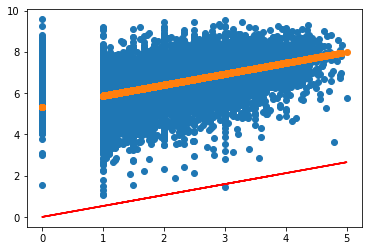

In [168]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

reg = LinearRegression()
x = df_merge["Complexity Average"].values
y = df_merge["Rating Average"].values
reg.fit(x.reshape(-1, 1), y)

w = reg.coef_[0]
plt.scatter(x, y)
plt.plot(x, w*x, c='red')

testX = np.array(df_merge["Complexity Average"]).reshape(-1, 1)
predY = reg.predict(testX)
plt.scatter(testX, predY)
plt.plot(testX, w*testX, c='red')

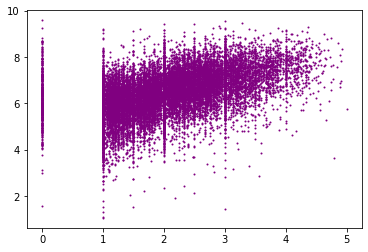

In [169]:
testY = df_merge["Rating Average"]
plt.scatter(testX, testY, c='purple', s=1)

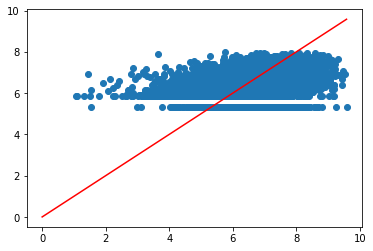

0.23120007389240327


In [170]:
testLoss = mean_squared_error(testX, predY)
plt.scatter(testY, predY)
plt.plot([0,np.max(testY)], [0,np.max(testY)], color='red')
plt.show()

r2 = r2_score(testY, predY)
print(r2)

0.38272784227841133
0.38272784227841133
0.5630389335827344


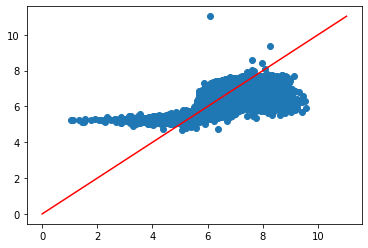

In [165]:
x = np.array(df_merge.iloc[:, [2,3,4,5,6,8]])
y = df_merge["Rating Average"]
reg = LinearRegression()
reg.fit(x, y)

trainY = reg.predict(x)
trainLoss = mean_squared_error(y, trainY)
print(trainLoss)
testX = np.array(df_merge.iloc[:, [2,3,4,5,6,8]])
predY = reg.predict(testX)
testY = df_merge["Rating Average"]
testLoss = mean_squared_error(testY, predY)
print(testLoss)

plt.scatter(testY, predY)
plt.plot([0,np.max(predY)], [0,np.max(predY)], color='red')

r22 = r2_score(testY, predY)
print(r22)